# Lecture 09 - 25 October 2021

## Fourier Transforms
Up to now the focus was on two main kind of Fourier Transforms:

**Fourier Integral** ($\mathcal{L}^2$ functions, based on Fourier theorem)
\begin{align*}
    f(t)&=\frac{1}{2\pi}\int_{-\infty}^{+\infty}\tilde{F}(\omega)e^{-i\omega t} d\omega \qquad \text{Inverse Fourier Transform} \\
    \tilde{F}(\omega)&=\int_{-\infty}^{+\infty}f(t)e^{i\omega t} dt \qquad \text{Fourier Transform}
\end{align*}

**Fourier Series** (for periodic functions)
\begin{align*}
    f(t)=\sum_{k} a_k e^{-i\omega_k t} \qquad \omega_k=\frac{2\pi}{T}k \qquad \text{Fourier Series}\\
    a_k=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} f(t) e^{i\omega_k t}dt \qquad \qquad \text{Fourier Coefficients}\\
\end{align*}

The fourier series needs the functions considered to be periodic. A quick fix for that is to truncate the function when they are sufficiently close to zero and repeat them.

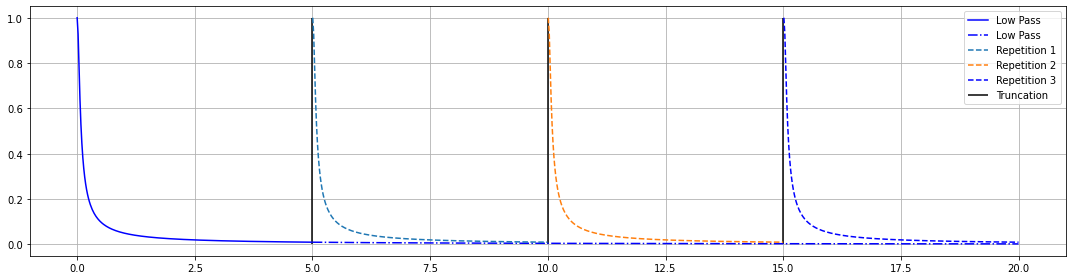

In [45]:
import matplotlib.pyplot as plt
import numpy as np

##############
# PARAMETERS #
##############
T=5 # When to truncate the function
tau = 20
omega = np.linspace(start=0, stop=20, num=1000, endpoint=True)

lp = np.abs(1/(1-1j*omega*tau) )

#########
# PLOTS #
#########
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

idx = (np.abs(omega - T)).argmin() # Closest value to T

ax.plot(omega[:idx], lp[:idx], "b", label="Low Pass")
ax.plot(omega[idx:], lp[idx:], "b-.", label="Low Pass")
ax.vlines(x=T, ymin=0, ymax=1, color="k", label="Truncation")

idx = (np.abs(omega - T)).argmin() # Closest value to T
i=1;
while ((i+1)*idx)<omega.shape[0]:
    ax.plot(omega[i*idx:(i+1)*idx], lp[:idx], "--", label="Repetition {:d}".format(i))
    ax.vlines(x=(i+1)*T, ymin=0, ymax=1, color="k")
    i=i+1

ax.plot(omega[i*idx:], lp[:omega.shape[0]-i*idx], "b--", label="Repetition {:d}".format(i))



ax.grid()
ax.legend()
fig.tight_layout()
plt.show()

## Discrete Fourier Transform

The _discrete Fourier Transform_ (DFT) is the discrete version of the Fourier Transform that does _not_ require the computation of integrals. The _fast Fourier Transform_ (FFT) is a faster way ($\mathcal{O}(Nlog(N))$ instead of $\mathcal{O}(N^2)$) to compute the DFT with some minor additional contraints. Let's walk through the DFT:

```{admonition} Assumption
Assume a function $f$ which is periodic ($f(t+T)=f(t)$) and has period equal to an _even_ multiple of the sampling time T: $T_f=NT, N\in\matchcal{N}^{+}_{even}$. 
```

The Fourier series of such a function is:
\begin{align*}
f(t)&= \sum_k a_k e^{- i\frac{2\pi k}{NT}t} \\
a_k&= \frac{1}{NT} \int_{-\frac{NT}{2}}^{\frac{NT}{2}} f(t)  e^{i\frac{2\pi}{NT}kt} dt = \int_{0}^{NT} f(t)  e^{i\frac{2\pi}{NT}kt} dt\qquad \omega_k = \frac{2\pi}{NT}k, \quad k\in \mathcal{Z}\\
\end{align*}

![](images/21-10-25_periodic_function.jpeg)


A minimal assumpion that is necessary to make is that
```{admonition} Assumption
$f(t)$ is $\frac{\pi}{T}$ band limited.
```
This assumption is minimal because one usually works with physical signals that needs to be sampled according to the [Nyquist-Shannon theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem):
\begin{align*}
-\frac{\pi}{T}\leq \omega_k \leq \frac{\pi}{T} \rightarrow -\frac{N}{2}\leq k < \frac{N}{2}
\end{align*}
and that explains why N was choosen even too.  
The series can then be written as:
\begin{align*}
f(t)&= \sum_{k=-\frac{N}{2}}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{NT}kt} = \sum_{k=0}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{NT}kt} + \sum_{k=-\frac{N}{2}}^{-1} a_k e^{-i\frac{2\pi}{NT}kt}
\end{align*}

It is possible to perform a change of variable in the second summation:
\begin{align*}
\sum_{k=-\frac{N}{2}}^{-1} a_k e^{-i\frac{2\pi}{NT}kt} = \sum_{k'=\frac{N}{2}}^{N-1} a_{k'-N} e^{-i\frac{2\pi}{NT}(k'-N)t} \qquad k'&=N+k\\
k&= k'-N
\end{align*}

so that the Fourier series becomes:

\begin{align*}
\require{cancel}
f(t)&= \sum_{k=0}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{NT}kt} + \sum_{k=-\frac{N}{2}}^{-1} a_k e^{-i\frac{2\pi}{NT}kt} \\
&= \sum_{k=0}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{NT}kt} + \sum_{k=\frac{N}{2}}^{N-1} a_{k-N} e^{-i\frac{2\pi}{NT}kt}e^{i\frac{2\pi}{\cancel{N}T}\cancel{N}t}
\end{align*}

As it was stated before, a physical signal is usually band limited and sampled with sampling time T:
\begin{align*}
f[n]=f(nT)&= \sum_{k=0}^{\frac{N}{2}-1} a_k e^{-i\frac{2\pi}{N\cancel{T}}kn\cancel{T}} + \sum_{k=\frac{N}{2}}^{N-1} a_{k-N} e^{-i\frac{2\pi}{N\cancel{T}}kn\cancel{T}}\cancelto{1}{e^{i\frac{2\pi}{T}nT}}
\end{align*}

this leads to a new series defined as:

\begin{align*}
F_k = \begin{cases}
a_k N \quad &\text{if } 0\leq k<\frac{N}{2} \\
a_{k-N}N \quad &\text{if } \frac{N}{2}\leq k<N \\
\end{cases} \quad \iff \quad a_k = \begin{cases}
\frac{F_k}{N} \quad &\text{if } 0\leq k<\frac{N}{2} \\
\frac{F_{k+N}}{N} \quad &\text{if } -\frac{N}{2}\leq k<0 \\
\end{cases}
\end{align*}

this new series allows to merge the two summations:
\begin{align*}
f[n] &= \sum_{k=0}^{\frac{N}{2}-1} \frac{F_k}{N} e^{-i\frac{2\pi}{N}kn} + \sum_{k=\frac{N}{2}}^{N-1} \frac{F_k}{N}e^{-i\frac{2\pi}{N}kn} \\
&= \frac{1}{N}\sum_{k=0}^{N-1} F_ke^{-i\frac{2\pi}{N}kn} \quad \text{Inverse DFT}
\end{align*}

As it is clear from the previous formula, the Inverse DFT allows us to compute the integral $a_k=\frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} f(t) e^{i\omega_k t}dt$ withot needing to perform any kind of integration. Furthermore:

\begin{align*}
\sum_{n=0}^{N-1}f[n]e^{i \frac{2\pi}{N}nl} &= \sum_{n=0} e^{i\frac{2\pi}{N}nl} \left(\frac{1}{N}\sum_{k=0}^{N-1}F_k e^{-i\frac{2\pi}{N}nk} \right)\\
&= \sum_{k=0} \frac{F_k}{N}\left[\sum_{n=0}^{N-1} e^{i\frac{2\pi}{N}n(l-k)}\right] \qquad [...]=\begin{cases}
\frac{1-e^{i2\pi/(l-k)}}{1-e^{i2\pi/(N(l-k))}}=0 \quad \text{if } l\not=k\\
N \quad \text{if } l=k 
\end{cases} \\&= \sum_{k=0}^{N-1}F_k \delta_{l,k}=F_l
\end{align*}

This relation provides an expression for the DFT. Summing up:

### Discrete Fourier Transform
\begin{align*}
F_k = \sum_{n=0}^{N-1}f[n]e^{i \frac{2\pi}{N}nl}
\end{align*}

### Inverse Discrete Fourier Transform
\begin{align*}
f[n]=\frac{1}{N}\sum_{k=0}^{N-1} F_ke^{-i\frac{2\pi}{N}kn}
\end{align*}

It's is essential to remark that what was found is a **way to compute a continuous transform $\mathcal{FT}$ using only discrete summations** which computers can handle very well and with minimum errors.

## Properties of the DFT

### Periodicity
#### In time  
\begin{align*}
f[n+T]=\sum_{n=0}^{N-1}\cancelto{1}{e^{-i\frac{2\pi}{N}kN}}=f[n]
\end{align*}

#### In Frequency
\begin{align*}
F_{k+N} = \sum_{n=0}^{N-1}f[n]e^{i \frac{2\pi}{N}nl}\cancelto{1}{e^{i\frac{2\pi}{N}nN}} = F_k
\end{align*}

#### Perceval relation
```{warning}
As the actual energy of a periodic signal is infinite. For that reason, when talking about energy for a periodic signal, only one period is taken in account.
```

\begin{align*}
\sum_{n=0}^{N-1} \left| f[n]\right|^2 &= \sum_{n=0}^{N-1} \left( \frac{1}{N}\sum_{k=0}^{N-1}F_ke^{-i \frac{2\pi}{N}nk} \right)\left( \frac{1}{N} \sum_{l=0}^{N-1}F_l^* e^{i \frac{2\pi}{N}nl} \right) \\
&= \frac{1}{N^2} \sum_{k=0}^{N-1} \sum_{l=0}^{N-1} F_k F_l^* \cancelto{\delta_{l,k}}{\sum_{n=0}^{N-1}e^{i\frac{2\pi}{N}n(l+k)}} \\
\implies & \sum_{n=0}^{N-1} \left| f[n]\right|^2 = \frac{1}{N^2}\sum_{n=0}^{N-1} \left| F_k\right|^2
\end{align*}

Finally, before moving to a small exercise let's introduce a new notation:

\begin{align*}
\begin{array}{l}
f_n &= f[n] \\
W_N&=e^{i\frac{2\pi}{N}} \quad \text{(Twiddle Factor)}\\
\end{array} \implies \begin{array}{l}
f_n &= \frac{1}{N}\sum_{k=0}^{N-1}F_k (W_N^*)^{nk} \qquad 0\leq k, n < N \\
F_k &= \sum_{n=0}^{N-1} f_n W_N^{nk}
\end{array}
\end{align*}

These two are the conventional form of the DFT and its inverse.
  
  
![](images/21-10-25_example_DFT.jpeg)